<h3>Codevita Internship - Data Science Project</h3>
<h4>Vaibhav Sharma <br><br>
Task - To predict weight of a person according to height using Linear Regression</h4>

Heights are in Inches and Weight is in Pound in the Dataset

<h5>Importing Data and Analysing</h5>

In [163]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [164]:
data=pd.read_csv(r'C:\Users\vaibh\desktop\DataSets-master\DataSets-master\weight-height.csv')

In [165]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [166]:
data["Gender"].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [167]:
XGH=data.iloc[:,0:2] #Feature
YW=data["Weight"]    #Target

In [168]:
XGH.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [169]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<h5>Encode Male With 1 And Female With 0</h5>

In [10]:
XGH["Gender"]=XGH["Gender"].map({"Male":1,"Female":0})

In [31]:
XGH.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


<h5>Split Data Into Training And tesing</h5>

In [76]:
from sklearn.model_selection import train_test_split     #Using Train Test Split

In [77]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(XGH,YW,test_size=.30,random_state=101)  #We are using 70% data to train


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
trainer=LinearRegression()

In [16]:
learner=trainer.fit(Xtrain,Ytrain)

In [17]:
m=learner.coef_  

In [18]:
m

array([19.80741394,  5.94306737])

In [19]:
c=learner.intercept_
c

-242.90146146696873

<h5>Error</h5>

In [141]:
Ya=Ytest
Yp=learner.predict(Xtest)    #Applying model on the test Data

In [142]:
YaVsYp=pd.DataFrame({"Ya":list(Ya),"Yp":list(Yp)})

In [162]:
YaVsYp.head()

,Ya,Yp
0,163.632026,167.662032
1,141.718207,130.260910
2,147.356066,143.196996
3,151.275533,138.363455
4,177.992066,172.331809


In [143]:
from sklearn.metrics import mean_squared_error

In [144]:
error=np.sqrt(mean_squared_error(Ya,Yp)) # Root mean squared Error

In [145]:
error

10.116764200868682

<h5>Visualizing Data</h5>

In [156]:
Ypw=m[1]*Xtest.iloc[:,1]+c+error

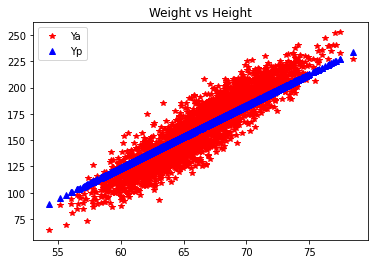

In [157]:
plt.plot(Xtest.iloc[:,1],Ya,'*r')
plt.plot(Xtest.iloc[:,1],Ypw,'^b')
plt.legend(["Ya","Yp"])
plt.title("Weight vs Height")
plt.show()